# Modelado de distribuciones

Las distribuciones que hemos utilizado hasta ahora se denominan distribuciones empíricas porque se basan en observaciones empíricas, es decir, en datos. Muchos conjuntos de datos que vemos en el mundo real pueden aproximarse estrechamente a una distribución teórica, que suele basarse en una función matemática simple.

Como ejemplos, veremos que:

*    En una **competición de tiro al plato**, el número de aciertos y fallos se modela bien mediante una **distribución binomial**.

*    En deportes como el **hockey** y el **fútbol**, el número de goles en un partido sigue una **distribución de Poisson**, y el tiempo entre goles sigue una **distribución exponencial**.

*    El **peso al nacer** sigue una **distribución normal**, también llamada gaussiana, y el **peso en la edad adulta** sigue una **distribución lognormal**.

Para cada ejemplo, comenzaremos con una simulación basada en un modelo simple y mostraremos que los resultados de la simulación siguen una distribución teórica. A continuación, veremos en qué medida los datos reales concuerdan con el modelo.

In [729]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Algunas Herramientas...

In [730]:
def from_seq(seq, name=None, normalize=True, sort=True, ascending=True, dropna=True, na_position="last", convert_to="PMF"):
  """Crea un PMF a partir de una secuencia de valores.
  Args:
      seq: iterable
      normalize: si se debe normalizar la serie (i.e, Pmf), por defecto True
      sort: si se debe ordenar la serie por valores, por defecto True
      ascending: si se debe ordenar en orden ascendente, por defecto True
      dropna: si se deben eliminar los valores NaN, por defecto True
      na_position: si es 'first', coloca los NaNs al principio;
                  si es 'last', coloca los NaNs al final.
      convert_to: si es 'Freq', Crea una tabla de frecuencia;
                  si es 'PMF' (default), crea una funcion de masa de probabilidad;
                  si es 'CDF', crea una función de distribución acumulada.

  Returns: pd.Series
  """
  if convert_to == "Freq":
    normalize=False

  # compute the value counts
  series = pd.Series(seq, name=name).value_counts(normalize=normalize, sort=sort, dropna=dropna)

  # sort in place, if desired
  if sort:
    series.sort_index(inplace=True, ascending=ascending, na_position=na_position)

  if convert_to == "CDF":
    series = np.cumsum(series)

  return series

def get_qs(Tab):
    """Obtener las cantidades.

    Returns: NumPy array
    """
    return Tab.index.values

def get_ps(Tab):
    """Obtener las probabilidades.

    Returns: NumPy array
    """
    return Tab.values

def plot_bar(Tab, xlabel="x", ylabel="y", title="tittle"):
    """Crea un gráfico de barras.

    Args:
        kwargs: se pasa a plt.bar
    """
    qs = get_qs(Tab)
    ps = get_ps(Tab)

    plt.bar(qs, ps)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

def plot_two_bars(Tab, Tab2, labels=None, xlabel="x", ylabel="y", title="tittle", width=0.45):
    """Crea un gráfico comparativo de dos barras.
    Args:
        Tab: PMF de distribucion que presuntamente se aproxima al comportamiento de los datos
        Tab2: PMF de los datos a analisar
        labels: Etiquetas a ser mostradas en el grafico, i.e., modelo y datos.
        xlabel: Etiqueta a mostrar en el eje x
        ylabel: Etiqueta a mostrar en el eje y
        tittle: Titulo que aparecera en el grafico.
    """
    plt.figure(figsize=(8, 5))

    qs = get_qs(Tab)
    ps = get_ps(Tab)

    plt.bar(qs, ps, align="edge", width=-width, label=labels[0])

    qs = get_qs(Tab2)
    ps = get_ps(Tab2)

    plt.bar(qs, ps, align="edge", width=width, label=labels[1])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)

def plot_cdf_plots(cdf_model, cdf_data, labels=["model", "data"], xlabel="x", ylabel="CDF", title=""):
    """Crea un gráfico comparativo de dos CDFs.
    Args:
        cdf_model: CDF de distribucion que presuntamente se aproxima al comportamiento de los datos
        cdf_data: CDF de los datos a analisar
        labels: Etiquetas a ser mostradas en el grafico, i.e., modelo y datos.
        xlabel: Etiqueta a mostrar en el eje x
        ylabel: Etiqueta a mostrar en el eje y
        tittle: Titulo que aparecera en el grafico.
    """
    plt.figure(figsize=(8, 5))

    plt.plot(get_qs(cdf_model),get_ps(cdf_model), linestyle=":", color="gray", label=labels[0])
    plt.plot(get_qs(cdf_data),get_ps(cdf_data), label=labels[1])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

---

## La distribución binomial

Como primer ejemplo, consideraremos el deporte del [tiro al plato](https://en.wikipedia.org/wiki/Skeet_shooting), en el que los competidores utilizan escopetas para disparar a discos de arcilla que se lanzan al aire.
En las competiciones internacionales, incluidas las Olimpiadas, hay cinco rondas con 25 blancos por ronda, con rondas adicionales según sea necesario para determinar un ganador.


Como modelo, supongamos que todos los participantes tienen la misma probabilidad, `p`, de acertar en todos los blancos.

<br>

Por supuesto, este modelo es una simplificación: en realidad, algunos competidores tienen una probabilidad mayor que otros, e incluso para un mismo competidor, puede variar de un intento a otro.
Pero, aunque no sea realista, este modelo hace algunas predicciones sorprendentemente precisas, como veremos.

<br>

Para simular el modelo, utilizaré la siguiente función, que toma el número de blancos (platos), `n`, y la probabilidad de acertar a cada uno, `p`, y devuelve una secuencia de 1 y 0 para indicar los aciertos y los fallos.

In [731]:
def flip(n, p):
    choices = [1, 0]
    probs = [p, 1 - p]
    return np.random.choice(choices, n, p=probs)

In [732]:
# Inicializa el generador de números aleatorios para que obtengamos los mismos resultados cada vez.
np.random.seed(1)

Aquí hay un ejemplo que simula una ronda de 25 objetivos en la que la probabilidad de acertar cada uno es del 90%.

In [733]:
objetivos = 25
prob = 0.9

flip(objetivos, prob)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1])

Si generamos una secuencia más larga y calculamos la `Pmf` de los resultados, podemos confirmar que las proporciones de 1 y 0 son correctas, al menos aproximadamente.

In [734]:
seq = flip(1000, 0.9)
pmf = from_seq(seq, convert_to="PMF")

pmf

0    0.101
1    0.899
Name: proportion, dtype: float64

Ahora podemos usar la funcion `flip` para simular una sola ronda de tiro al plato y devolver el número de aciertos.

In [735]:
def simulate_round(n, p):
    seq = flip(n, p)
    return seq.sum()

En una competición grande, supongamos que 200 competidores disparan 5 rondas cada uno (200 $\times$ 5 = 1,000 resultados), todos con la misma probabilidad de dar en el blanco, `p=0.9`.

Podemos simular una competición como esa llamando a `simulate_round` 1000 veces.

In [736]:
n = 25
p = 0.9
results_sim = [simulate_round(n, p) for i in range(1000)]

In [737]:
print(f"Calculo: {np.mean(results_sim).item()}, Teorico: {n * p}")

Calculo: 22.522, Teorico: 22.5


La puntuación media es cercana a `22.5`, que es el producto de `n` y `p`.

Así es como se ve la distribución de los resultados.

In [738]:
pmf_sim = from_seq(results_sim)
pmf_sim

17    0.001
18    0.012
19    0.019
20    0.054
21    0.142
22    0.237
23    0.256
24    0.211
25    0.068
Name: proportion, dtype: float64

In [739]:
pmf_sim.index

Index([17, 18, 19, 20, 21, 22, 23, 24, 25], dtype='int64')

In [740]:
len(pmf_sim)

9

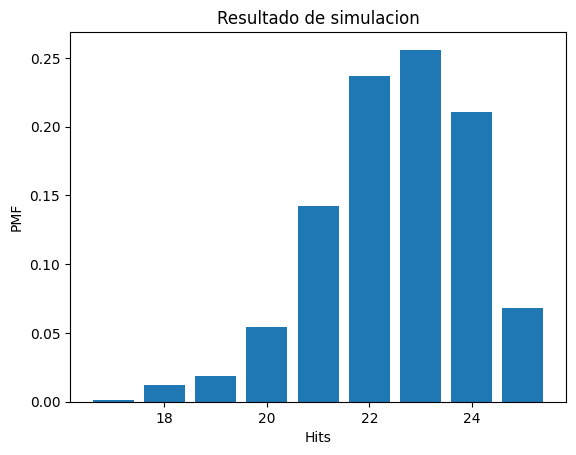

In [741]:
plot_bar(pmf_sim, xlabel='Hits', ylabel='PMF', title='Resultado de simulacion')
plt.show()

El pico está cerca de la media (`22.5`) y la distribución está **sesgada hacia la izquierda**.

En lugar de realizar una simulación, podríamos haber predicho esta distribución.
Matemáticamente, la distribución de estos resultados sigue una **distribución binomial**, que tiene una PMF fácil de calcular.

Recordemos que la función de masa de probabilidad (PMF) de una distribución binomial se expresa como:

$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
$$

donde:

- $P(X = k)$: probabilidad de obtener exactamente \( k \) éxitos en \( n \) ensayos,
- $\binom{n}{k} = \frac{n!}{k!(n-k)!}$: coeficiente binomial,
- $p$: probabilidad de éxito en un ensayo,
- $(1 - p)$: probabilidad de fracaso,
- $k$: número de éxitos deseados,
- $n$: número total de ensayos.

La libreria `SciPy` proporciona la función `comb`, que calcula el número de combinaciones de `n` elementos tomando `k` a la vez.

La funcion `binomial_pmf` calcula la probabilidad de obtener `k` aciertos de `n` intentos, dado `p`.
Si llamamos a esta función con un rango de valores `k`, podemos crear un `Pmf` que represente la distribución de los resultados.

In [742]:
from scipy.special import comb

def binomial_pmf(k, n, p):
    return comb(n, k) * (p**k) * ((1 - p) ** (n - k))

In [743]:
ks = np.arange(16, n + 1)
ps = binomial_pmf(ks, n, p)

pmf_binom = pd.Series(data=ps, index=ks, name="binomial model")
pmf_binom

16    0.000379
17    0.001804
18    0.007215
19    0.023924
20    0.064594
21    0.138415
22    0.226497
23    0.265888
24    0.199416
25    0.071790
Name: binomial model, dtype: float64

In [744]:
pmf_sim

17    0.001
18    0.012
19    0.019
20    0.054
21    0.142
22    0.237
23    0.256
24    0.211
25    0.068
Name: proportion, dtype: float64

Y así es como se ve en comparación con los resultados de la simulación.

<Figure size 800x500 with 0 Axes>

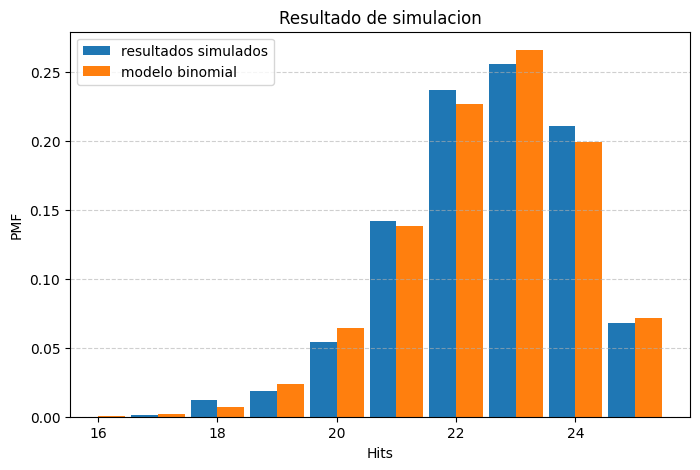

In [745]:
plt.figure(figsize=(8, 5))

plot_two_bars(pmf_sim, pmf_binom, labels=["resultados simulados","modelo binomial"], xlabel='Hits', ylabel='PMF', title='Resultado de simulacion')

plt.show()

Y así es como se ve en comparación con los resultados de la simulación.

Son similares, con pequeñas diferencias debido a la variación aleatoria en los resultados de la simulación.
Esta coincidencia no debería sorprender, ya que la simulación y el modelo se basan en los mismos supuestos, en particular el supuesto de que cada intento tiene la misma probabilidad de éxito.
Una prueba más sólida de un modelo es cómo se compara con los datos reales.



---

# **EJEMPLO**


De la página de Wikipedia sobre la competición masculina de tiro al plato en los Juegos Olímpicos de Verano de 2020, podemos extraer una tabla que muestra los resultados de las rondas de clasificación.
Las instrucciones para descargar los datos se encuentran en este notebook, a continuacion:

Descargar desde <https://en.wikipedia.org/wiki/Shooting_at_the_2020_Summer_Olympics_–_Men's_skeet>

In [746]:
link = "https://en.wikipedia.org/wiki/Shooting_at_the_2020_Summer_Olympics_%E2%80%93_Men%27s_skeet"

tables = pd.read_html(link)
table = tables[6]
table.head()

,Rank,Athlete,Country,1,2,3,4,5,Total[3],Shoot-off,Notes
0,1,Éric Delaunay,France,25,25,25,24,25,124,+6,"Q, OR"
1,2,Tammaro Cassandro,Italy,24,25,25,25,25,124,+5,"Q, OR"
2,3,Eetu Kallioinen,Finland,25,25,24,25,24,123,NaN,Q
3,4,Vincent Hancock,United States,25,25,25,25,22,122,+8,Q
4,5,Abdullah Al-Rashidi,Kuwait,25,25,24,25,23,122,+7,Q


## Objetivo

La idea de este ejercicio es verificar si con una **distribución binomial teorica** podemos aproximarnos a la distribucion empírica del número de aciertos/fallos en una **competición de tiro al plato**

<br>

Para esto necesitaremos:
- Procesar los datos para obtener la informacion requerida.
- Calcular la probabilidad empirica de exito para modelar su distribucion.
- Comparar la distribuciones (teorica y empirica) para verificar/rechazar la aproximacion.

La tabla tiene una fila para cada competidor, con una columna para cada una de las cinco rondas (1, 2, 3, 4, 5).

<br>

Selecciona sola las columnas que contienen estos resultados (1, 2, 3, 4, 5) y utiliza la función de `NumPy` llamada `flatten` para transformar la tabla de rondas en un solo vector.

In [747]:
columns = ["1", "2", "3", "4", "5"]
results = table[columns].values.flatten()
print("Tamaño:", results.shape)
results

Tamaño: (150,)


array([25, 25, 25, 24, 25, 24, 25, 25, 25, 25, 25, 25, 24, 25, 24, 25, 25,
       25, 25, 22, 25, 25, 24, 25, 23, 25, 24, 23, 25, 25, 24, 25, 25, 25,
       23, 24, 24, 25, 25, 24, 25, 24, 24, 25, 24, 23, 25, 24, 24, 25, 23,
       25, 24, 24, 25, 24, 25, 24, 23, 25, 24, 25, 24, 24, 24, 25, 24, 25,
       23, 24, 24, 24, 23, 24, 25, 24, 24, 23, 24, 25, 25, 23, 25, 23, 24,
       24, 25, 24, 23, 24, 25, 24, 24, 24, 23, 23, 24, 23, 24, 25, 25, 25,
       23, 22, 24, 24, 24, 23, 25, 23, 25, 24, 23, 24, 23, 24, 23, 23, 23,
       24, 25, 24, 22, 23, 23, 25, 23, 23, 22, 23, 23, 23, 23, 22, 23, 23,
       25, 23, 24, 19, 23, 22, 22, 25, 20, 21, 22, 22, 23, 19])

Con 5 rondas para cada uno de los 30 competidores, deberiamos obtener un vector de 150 rondas totales

<br>

Dados los resultados de estas 150 rondas de 25 tiros cada una,

Calcule la tasa de éxito global, para esto:
- Calcule la cantidad de puntos/aciertos maximos se pueden obtener en el total de las rondas.
- Calcule la cantidad de puntos/aciertos que se obtuvieron en las rondas.

In [748]:
total_shots = 25 * len(results) # Aciertos maximos posibles
total_hits = results.sum() # Aciertos obtenidos

n, total_shots, total_hits.item()

(25, 3750, 3581)

Por lo tanto, el calculo de la tasa de éxito global es del ___ %. Guardelo en una variable `p`.

In [749]:
p = total_hits / total_shots
p.item()

0.9549333333333333

Ahora calculemos una **función de masa de probabilidad** (Pmf), definida anteriormente `binomial_pmf(k, n, p)`, que represente la distribución binomial de una ronda `n=25` y el valor de `p` que acabamos de calcular.

<br>

Convierta el resultado en una `Series` de la libreria `pandas`.



In [750]:
#ks = np.arange(16, n + 1)

ps = binomial_pmf(ks, n, p)

pmf_binom = pd.Series(data=ps, index=ks, name="modelo binomial")
pmf_binom

16    7.490845e-07
17    8.403149e-06
18    7.913655e-05
19    6.177876e-04
20    3.927155e-03
21    1.981282e-02
22    7.633106e-02
23    2.109659e-01
24    3.725193e-01
25    3.157376e-01
Name: modelo binomial, dtype: float64

Y podemos compararla con la `Pmf` de los **resultados reales**. No olvides convertir los resultados reales en una `Series` de la libreria `pandas`, `from_seq`. Posteriormente, grafique en conjunto los resultados reales y el modelo binomial, `plot_two_bars`.

In [751]:
pmf_results = from_seq(results, name="resultados reales", convert_to="PMF")
pmf_results

resultados reales
19    0.013333
20    0.006667
21    0.006667
22    0.060000
23    0.240000
24    0.326667
25    0.346667
Name: proportion, dtype: float64

<Figure size 800x500 with 0 Axes>

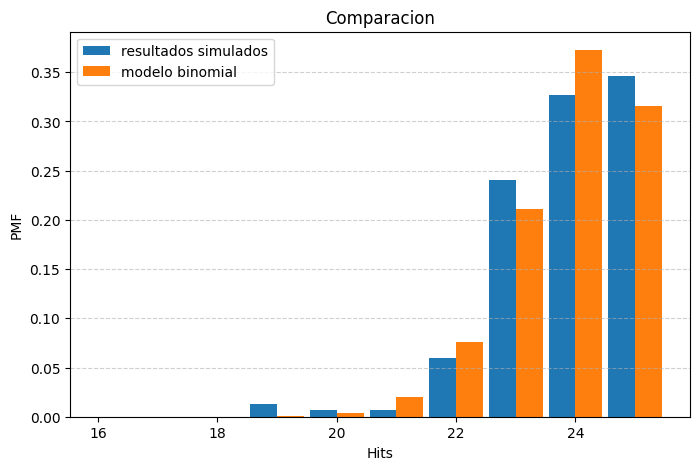

In [752]:
plt.figure(figsize=(8, 5))

plot_two_bars(pmf_results, pmf_binom, labels=["resultados simulados","modelo binomial"], xlabel='Hits', ylabel='PMF', title='Comparacion')

plt.show()

Menciona que tan bien se ajusta nuestro modelo a la distribucion de los datos, considerando que **parte de la hipótesis poco realista de que todos los competidores tienen la misma capacidad**, que no varía.

```
Son similares, con pequeñas diferencias debido a la variación aleatoria en los
resultados de la simulación. Esta coincidencia no debería sorprender, ya que la
simulación y el modelo se basan en los mismos supuestos, en particular el
supuesto de que cada intento tiene la misma probabilidad de éxito. Una prueba
más sólida de un modelo es cómo se compara con los datos reales.
```

In [753]:
def qqplot(modelo, data):
  # Número de muestras sintéticas a generar
  n_samples = 1_000

  # Generar muestras a partir de las PMF
  prob_model = get_ps(modelo)
  prob_model /= prob_model.sum()

  prob_data = get_ps(data)
  prob_data /= prob_data.sum()

  modelo_sample = np.random.choice(get_qs(modelo), size=n_samples, p=prob_model)
  data_sample = np.random.choice(get_qs(data), size=n_samples, p=prob_data)

  # Ordenar las muestras
  modelo_sorted = np.sort(modelo_sample)
  data_sorted = np.sort(data_sample)

  # Crear el QQ-plot comparando cuantiles de ambas muestras
  plt.figure(figsize=(9, 9))
  plt.plot(modelo_sorted, data_sorted, 'o', label="Quantile pairs")
  plt.plot([min(modelo_sample.min(), data_sample.min()), max(modelo_sample.max(), data_sample.max())],
           [min(modelo_sample.min(), data_sample.min()), max(modelo_sample.max(), data_sample.max())],
           'r--', label="Línea de 45°")
  plt.xlabel("Theoretical Quantiles")
  plt.ylabel("Sample Quantiles")
  plt.title("QQ-Plot: Comparación de dos distribuciones")
  plt.legend()
  plt.grid(True)



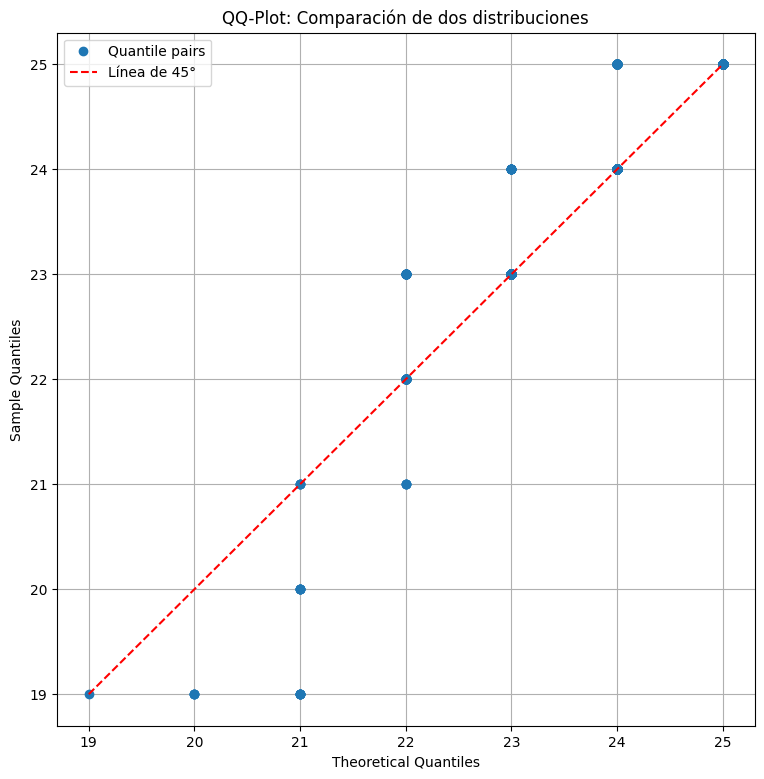

In [754]:
qqplot(pmf_binom, pmf_results)

---
---
## La distribución de Poisson

Como otro ejemplo en el que los resultados de los eventos deportivos siguen patrones predecibles, veamos el número de goles marcados en los partidos de hockey sobre hielo.

Comenzaremos simulando un partido de `60` minutos, es decir, `3600` segundos, suponiendo que los equipos marcan un total de `6` goles por partido, de media, y que la probabilidad de marcar un gol, `p`,  es la misma durante cualquier segundo.

In [755]:
n = 3600
m = 6
p = m / 3600
p

0.0016666666666666668

Ahora podemos utilizar la siguiente función para simular `n` segundos y devolver el número total de goles marcados.

In [756]:
def simulate_goals(n, p):
    return flip(n, p).sum()

Si simulamos muchos partidos (`1,001`), podemos confirmar que el número medio de goles por partido es cercano a `6`.

In [757]:
goals = [simulate_goals(n, p) for i in range(1001)]
np.mean(goals)

np.float64(6.01998001998002)

Podríamos utilizar la `distribución binomial` para modelar estos resultados, pero cuando `n` es grande y `p` es pequeño, los resultados también se modelan bien mediante una `distribución de Poisson`, que se especifica mediante un valor que suele denotarse con la letra griega `λ`, que se pronuncia **lambda** y se representa en el código con la variable `lam` (`lambda` no es un nombre de variable válido porque es una palabra clave de Python).
`lam` representa la tasa de goles marcados, que en el ejemplo es de 6 goles por partido.

<br>

La `PMF` de la **distribución de Poisson** es fácil de calcular: dado `lam`, podemos utilizar la siguiente función para calcular la probabilidad de ver `k` goles en un partido.

In [758]:
from scipy.special import factorial


def poisson_pmf(k, lam):
    """Calcula la función de probabilidad de Poisson.

    k (int o tipo matriz): El número de ocurrencias.
    lam (float): El parámetro de tasa (λ) de la distribución de Poisson.

    Devuelve: float o matriz de dimensiones variables.
    """
    return (lam**k) * np.exp(-lam) / factorial(k)

La libreria `SciPy` proporciona la función `factorial`, que calcula el producto de los números enteros desde `1` hasta `k`.

Si llamamos a `poisson_pmf` con un rango de valores `k`, podemos crear una `Pmf` que represente la distribución de los resultados.

In [759]:
lam = 6
ks = np.arange(20)
ps = poisson_pmf(ks, lam)

pmf_poisson = pd.Series(data=ps, index=ks, name="modelo Poisson")
pmf_poisson

0     0.002479
1     0.014873
2     0.044618
3     0.089235
4     0.133853
5     0.160623
6     0.160623
7     0.137677
8     0.103258
9     0.068838
10    0.041303
11    0.022529
12    0.011264
13    0.005199
14    0.002228
15    0.000891
16    0.000334
17    0.000118
18    0.000039
19    0.000012
Name: modelo Poisson, dtype: float64

Podemos confirmar que la `media` de la distribución es cercana a `6`. Recuerde el `valor esperado`.

In [760]:
np.sum(get_ps(pmf_poisson) * get_qs(pmf_poisson)).item()

5.999894417747437

La siguiente figura compara los resultados de la simulación con la distribución de Poisson con la misma media.

In [761]:
pmf_sim = from_seq(goals)
pmf_sim

0     0.002997
1     0.011988
2     0.046953
3     0.079920
4     0.133866
5     0.166833
6     0.163836
7     0.145854
8     0.090909
9     0.069930
10    0.049950
11    0.015984
12    0.008991
13    0.007992
14    0.002997
15    0.000999
Name: proportion, dtype: float64

<Figure size 800x500 with 0 Axes>

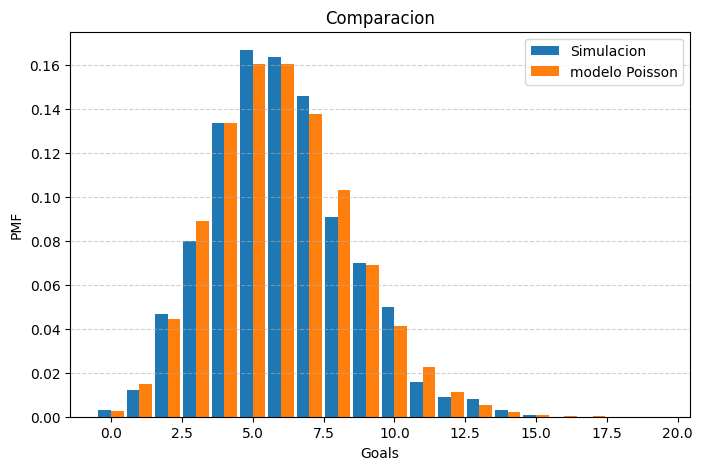

In [762]:
plt.figure(figsize=(8, 5))

plot_two_bars(pmf_sim, pmf_poisson, labels=["Simulacion","modelo Poisson"], xlabel='Goals', ylabel='PMF', title='Comparacion')

plt.show()

Las distribuciones son similares, salvo por pequeñas diferencias debidas a variaciones aleatorias.
Esto no debería sorprender, ya que la simulación y el modelo de Poisson se basan en la misma hipótesis de que la probabilidad de marcar un gol es la misma durante cualquier segundo del partido.
Por lo tanto, una prueba más rigurosa consiste en comprobar en qué medida el modelo se ajusta a los datos reales.

---

# **EJERCICIO**

Desde `HockeyReference`, descargué los resultados de todos los partidos de la temporada regular 2023-2024 de la Liga Nacional de Hockey (NHL) (sin incluir los playoffs).

Se extrajo información sobre los goles marcados durante los 60 minutos de juego reglamentario, sin incluir las prórrogas ni los tiros penales para desempatar.

Los resultados se encuentran en un archivo HDF con una clave para cada partido y una lista de tiempos, en segundos desde el comienzo del partido, en los que se marcó un gol.

Data original descargada de <https://www.hockey-reference.com/leagues/NHL_2024_games.html>

Así es como leemos las claves del archivo.

In [763]:
import requests

# URL del archivo
url = "https://github.com/AllenDowney/ThinkStats/raw/v3/data/nhl_2023_2024.hdf"
filename = "nhl_2023_2024.hdf"  # Nombre local donde se guardará

# Descargar el archivo
response = requests.get(url)
with open(filename, "wb") as f:
    f.write(response.content)

# Abrir el archivo y obtener las claves (keys)
with pd.HDFStore(filename, "r") as store:
    keys = store.keys()

print("Partidos: ", len(keys))
print("\nPrimeros 5 partidos:")
for i in range(5):
  print(keys[i])

Partidos:  1312

Primeros 5 partidos:
/202310100PIT
/202310100TBL
/202310100VEG
/202310110BOS
/202310110CAR


Hubo `1,312` partidos durante la temporada regular.

Cada clave contiene la fecha del partido y una abreviatura de tres letras para el equipo local.

Podemos usar `read_hdf` de la libreria `pandas` para buscar una clave y obtener la lista de veces que se marcó un gol.

In [764]:
times = pd.read_hdf(filename, key=keys[0])
times

0     424
1    1916
2    2137
3    3005
4    3329
5    3513
dtype: int64

En el primer partido de la temporada se marcaron `6 goles`, el primero tras `424 segundos` de juego y el último tras `3513 segundos`, cuando solo quedaban `87 segundos` para el final del partido.

---



In [765]:
(3600 - times[5]).item()

87

Utiliza un bucle que lea los resultados de todos los partidos (`keys`), utiliza la funcion `read_hdf` para poder leer del archivo los datos de cada juego en `keys`.

```
pd.read_hdf(filename, key=keys)
```
donde keys es cada uno de los partidos, por ejemplo:
```
/202310100PIT
/202310100TBL
/202310100VEG
/202310110BOS
/202310110CAR
```

cuenta el número de goles en cada uno y almacena los resultados en una lista, `goals`.

In [766]:
# Tu codigo va aqui
goals = []
for key in keys:
    times = pd.read_hdf(filename, key=key)
    goals.append(len(times))
    



Confirma que el promedio de goles en `goals` por partido sea alrededor de lo sospechado.

In [767]:
# Tu codigo va aqui
goals = np.array(goals)
goals_mean= goals.mean()
print(goals_mean)

6.0182926829268295


Podemos utilizar `poisson_pmf` para crear una `Pmf` (convertir en una `Series`) que represente una distribución de Poisson con la misma `media` que los datos.

In [768]:
# Tu codigo va aqui
lam = goals_mean
ks = np.arange(goals.min(), goals.max() + 1)
ps = poisson_pmf(ks, lam)
poisson_dist = pd.Series(data=ps, index=ks, name="modelo Poisson")
poisson_dist

0     0.002434
1     0.014647
2     0.044076
3     0.088421
4     0.133036
5     0.160130
6     0.160619
7     0.138093
8     0.103885
9     0.069468
10    0.041808
11    0.022874
12    0.011472
13    0.005311
14    0.002283
15    0.000916
16    0.000345
17    0.000122
Name: modelo Poisson, dtype: float64

Compara con la `Pmf` de los **resultados reales**, puedes utilizar `from_seq`, y grafique en conjunto los resultados reales y el modelo Poisson, `plot_two_bars`.

Nombra la variable que contenga el pmf de los **resultados reales** como `pmf_goals`.



<Figure size 800x500 with 0 Axes>

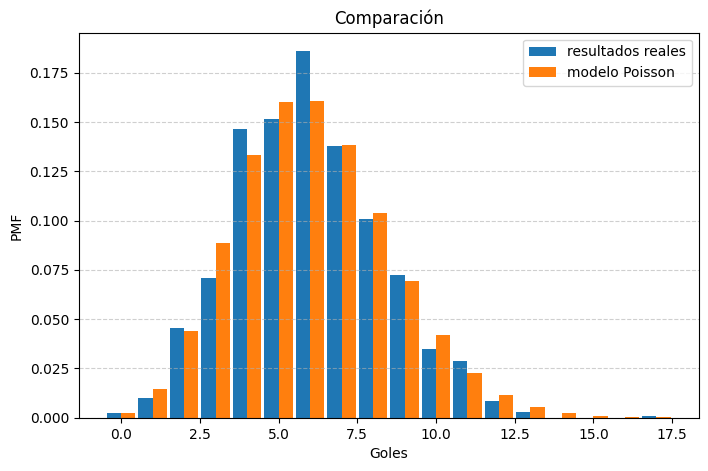

In [769]:
# Tu codigo va aqui
pmf_goals = from_seq(goals, name="resultados reales", convert_to="PMF")

plt.figure(figsize=(8, 5))
plot_two_bars(pmf_goals, poisson_dist, labels=["resultados reales", "modelo Poisson"], xlabel='Goles', ylabel='PMF', title='Comparación')
plt.show()

Menciona que tan bien se ajusta nuestro modelo a la distribucion de los datos

```
# Tu respuesta va aqui
El modelo de Poisson sigue la misma forma general de los datos reales. La media parece estar capturada bien por el modelo aunque exiten algunas diferencias notables ya que los datos reales muestran  una variablidad ligeramente mayor a la del modelo y existen algunas discrepancias en la frecuencuas exactas, especialmente en el pico de la distribucion 
```

A continuacion se muestra el QQ-plot del pmf de los datos reales, `pmf_goals`.

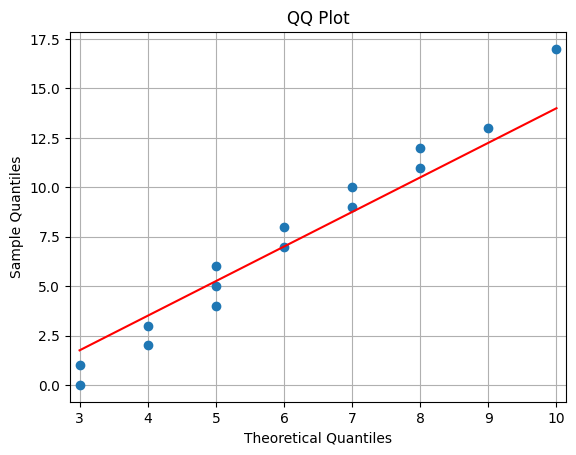

In [770]:
import statsmodels.api as sm
from scipy import stats

lam = 6

fig = sm.qqplot(pmf_goals.index, dist=stats.poisson(lam), line="q")

plt.title("QQ Plot")
plt.grid()
plt.show()


---
---

## La distribución exponencial

Anteriormente, simulamos un modelo simple de un partido de hockey en el que un gol tiene la misma probabilidad de ser marcado durante cualquier segundo del partido.
Bajo el mismo modelo, resulta que el tiempo hasta el primer gol sigue una **distribución exponencial**.

Para demostrarlo, supongamos de nuevo que los equipos marcan un total de `6 goles de media`, y calculamos la `probabilidad de que se marque un gol durante cada segundo`.


In [771]:
n = 3600
m = 6
p = m / 3600
p

0.0016666666666666668

La siguiente función simula `n` segundos y utiliza la funcion `argmax` para encontrar el momento del primer gol.

In [772]:
def simulate_first_goal(n, p):
    return flip(n, p).argmax()

Esto funciona porque el resultado de `flip` es una secuencia de 1 y 0, por lo que el máximo es casi siempre 1.
Si hay al menos un gol en la secuencia, `argmax` devuelve el índice del primero.
Si no hay goles, devuelve 0, pero eso ocurre tan raramente que lo ignoraremos.

In [773]:
np.random.seed(3) #linea con propositos de reproducibilidad

Utilice la funcion `simulate_first_goal` para simular `1,001` partidos y hacer una lista de los tiempos hasta el primer gol. Nombre la variable que contendra la lista como `first_goal_times`.

Adicionalmente, Calcule el `tiempo promedio` hasta el primer gol.

In [774]:
# Tu codigo va aqui
first_goal_times = [simulate_first_goal(n, p) for _ in range(1001)]
first_goal_times[:10]


[np.int64(218),
 np.int64(440),
 np.int64(971),
 np.int64(139),
 np.int64(173),
 np.int64(306),
 np.int64(285),
 np.int64(1248),
 np.int64(157),
 np.int64(1177)]

In [775]:
# Tu codigo va aqui
mean= np.mean(first_goal_times)
print("Tiempo promedio hasta el primer gol:", mean)

Tiempo promedio hasta el primer gol: 597.7902097902098


Cuando `n` es grande y `p` es pequeño, podemos demostrar matemáticamente que el tiempo esperado hasta el primer gol sigue una `distribución exponencial`.

Dado que la simulación genera muchos valores de tiempo únicos, utilizaremos las `CDF` para comparar las distribuciones, en lugar de las `PMF`.
Y la `CDF de la distribución exponencial` es fácil de calcular.

Complete la funcion `exponential_CDF`.

In [776]:
def exponential_CDF(x, lam):
    """"Calcula la función de distribución acumulativa exponencial.

    x: float o secuencia de floats
    lam: parámetro de tasa

    devuelve: flotante o matriz NumPy de probabilidad acumulativa
    """
    # Tu codigo va aqui
    x = np.asarray(x)         
    exponential_cdf = 1 - np.exp(-lam * x) # fórmula de la CDF exponencial
    return exponential_cdf

    
    
   

El valor de `lam` es el número promedio de eventos por unidad de tiempo; en este ejemplo, son goles por segundo.
Podemos utilizar el promedio de los resultados simulados para calcular `lam`.

In [777]:
lam = 1 / mean
lam.item()

0.0016728276636563566

Si llamamos a esta función con un rango de valores de tiempo, podemos aproximar la distribución de los tiempos del primer gol.
La función NumPy `linspace` crea una matriz de valores equidistantes; en este ejemplo, calcula `201` valores entre `0 y 3600`, ambos incluidos.

In [778]:
ts = np.linspace(0, 3600, 201)
ps = exponential_CDF(ts, lam)

cdf_expo = pd.Series(data=ps, index=ts, name="exponential model")
cdf_expo

0.0       0.000000
18.0      0.029662
36.0      0.058444
54.0      0.086373
72.0      0.113473
            ...   
3528.0    0.997265
3546.0    0.997346
3564.0    0.997425
3582.0    0.997502
3600.0    0.997576
Name: exponential model, Length: 201, dtype: float64

Ahora toca poner los datos simulados, obtenidos en `first_goal_times`, en su forma `CDF` para comparar las distribuciones. Puede utilizar la funcion `from_seq`. Nombre a la variable con el CDF como `cdf_sim`.

In [779]:
# Tu codigo va aqui
cdf_sim = from_seq(first_goal_times, name="simulación", convert_to="CDF")
cdf_sim.heah()

AttributeError: 'Series' object has no attribute 'heah'

La siguiente figura compara los resultados de la simulación con la distribución exponencial que acabamos de calcular.

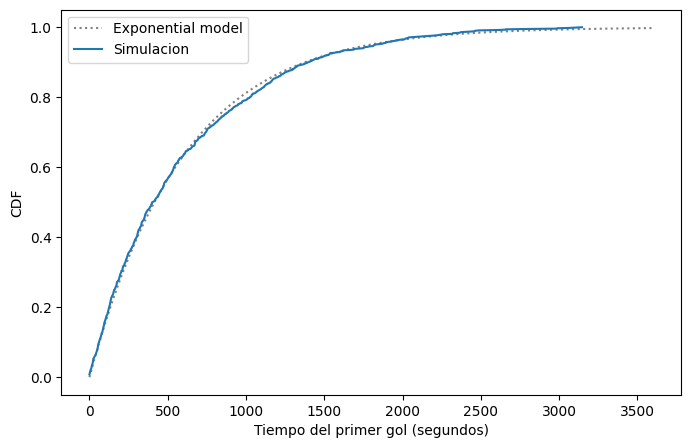

In [ ]:
plot_cdf_plots(cdf_expo, cdf_sim, labels=["Exponential model", "Simulacion"], xlabel="Tiempo del primer gol (segundos)")

El modelo exponencial se ajusta muy bien a los resultados de la simulación, pero una prueba más rigurosa es ver cómo funciona con datos reales.


**El siguiente bucle lee los resultados de todos los partidos, obtiene el tiempo del primer gol y almacena el resultado en una lista.
Si no se marcaron goles, añade `nan` a la lista.**

In [ ]:
filename = "nhl_2023_2024.hdf"

with pd.HDFStore(filename, "r") as store:
    keys = store.keys()

In [ ]:
firsts = []

for key in keys:
    times = pd.read_hdf(filename, key=key)
    if len(times) > 0:
        firsts.append(times[0]) #tiempo del primer gol
    else:
        firsts.append(np.nan)   #si no hubiero goles, rellenar con NAN

print("Tiempo (en segundos) de primer gol en los primeros 5 partidos")
for i in firsts[:5]:
  print(i)

Tiempo (en segundos) de primer gol en los primeros 5 partidos
424
588
436
337
194


Estima la tasa de goles marcados (variable `lam`), puedes utilizar la funcion `nanmean` de la libreria `numpy` (np), que calcula la media de los tiempos, ignorando los valores `nan`.

In [ ]:
# Tu codigo va aqui
lam = 1 / np.nanmean(firsts)
print(f"Tasa estimada de goles: {lam}")

Tasa estimada de goles: 0.0015121567467720825


Ahora podemos calcular la `CDF` de una `distribución exponencial` utilizando la funcion `exponential_cdf` con la misma tasa de goles que los datos (`lam`). LLama a esta variable como `cdf_expo`.

In [ ]:
# Tu codigo va aqui
ts = np.linspace(0, 3600, 201)
ps = exponential_CDF(ts, lam)
cdf_expo = pd.Series(data=ps, index=ts, name="exponential model")
cdf_expo.head()

0.0     0.000000
18.0    0.029662
36.0    0.058444
54.0    0.086373
72.0    0.113473
Name: exponential model, dtype: float64

Para calcular la `CDF` de los `datos`, podemos utilizar la funcion `from_seq` con el argumento `dropna=False`, que incluye valores `nan` al final. Nombra la variable que contenga el CDF como `cdf_firsts`.

In [780]:
# Tu codigo va aqui
cdf_firsts = from_seq(firsts, name="datos", convert_to="CDF", dropna=False)
cdf_firsts

datos
11.0      0.001524
15.0      0.005335
16.0      0.006860
17.0      0.007622
18.0      0.009146
            ...   
3120.0    0.995427
3198.0    0.996189
3286.0    0.996951
3581.0    0.997713
NaN       1.000000
Name: proportion, Length: 891, dtype: float64

In [ ]:
cdf_firsts.tail()

datos
3120.0    0.995427
3198.0    0.996189
3286.0    0.996951
3581.0    0.997713
NaN       1.000000
Name: proportion, dtype: float64

La siguiente figura compara la distribución exponencial con la distribución de los datos.

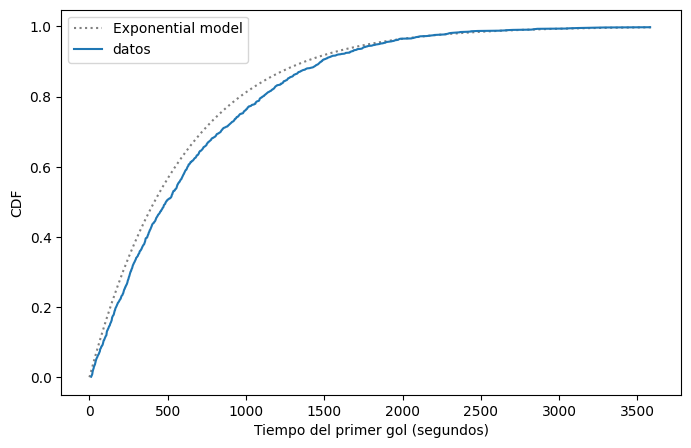

In [781]:
plot_cdf_plots(cdf_expo, cdf_firsts, labels=["Exponential model", "datos"], xlabel="Tiempo del primer gol (segundos)")

Describe que tan bien/mal se ajusta nuestro modelo a la distribucion de los datos

```
# Tu respuesta va aqui

El modelo se ajusta muy bien a la distribucion de datos que tenemos, podemos ver que la linea punteada sigue la forma de los datos.
```

La hipótesis subyacente de estos modelos (el modelo de Poisson para los goles y el modelo exponencial para los tiempos) es que un gol es igualmente probable en cualquier segundo del partido.

Si le preguntas a un aficionado al hockey si eso es cierto, te dirá que no, y tendrá razón: el mundo real viola supuestos como estos de muchas maneras.
Sin embargo, las distribuciones teóricas a menudo se ajustan muy bien a los datos reales.

---
---
## La distribución Normal

Muchas cosas que medimos en el mundo real siguen una **distribución normal**, también conocida como distribución gaussiana o *curva de campana*.
Para ver de dónde provienen estas distribuciones, consideremos un modelo del crecimiento de las calabazas gigantes.

Supongamos que cada día, una calabaza gana `1 libra` (≈ 0.45kg) si el tiempo es malo, `2 libras` (≈ 0.9kg) si el tiempo es regular y `3 libras` (≈ 1.36kg) si el tiempo es bueno.
Y **supongamos que el tiempo cada día es malo, regular o bueno con la misma probabilidad**.

<br>

Podemos utilizar la siguiente función, `simulate_growth`, para simular este modelo durante `n` días y obtener el total de las ganancias de peso.


In [ ]:
def simulate_growth(n):
  choices = [1, 2, 3]
  gains = np.random.choice(choices, n)
  return gains.sum()

<br>

El módulo `random` de `NumPy` proporciona una función `choice` que genera una matriz de `n` selecciones aleatorias a partir de una secuencia de valores, `choices` en este ejemplo.

<br>

Ahora supongamos que `1,001` personas cultivan calabazas gigantes en diferentes lugares con diferentes condiciones climáticas.
Si simulamos el proceso de crecimiento durante `100 días`, obtenemos una lista de `1,001 pesos`.

In [ ]:
sim_weights = [simulate_growth(100) for i in range(1001)]
m, s = np.mean(sim_weights), np.std(sim_weights)

print(f"Peso promedio: {m:4f}, desviacion std: {s:4f}")

Peso promedio: 199.370629, desviacion std: 8.388631


La `media` es cercana a `200 libras` y la `desviación estándar` es de aproximadamente `8 libras`.

Para ver si los pesos siguen una `distribución normal`, utilizaremos la siguiente función, que toma una muestra y crea una `Cdf` que representa una distribución normal con la misma media y desviación estándar que la muestra, evaluada en el rango de 4 desviaciones estándar por debajo de la media a 4 desviaciones estándar por encima.

In [ ]:
from scipy.stats import norm

def make_normal_model(data):
  m, s = np.mean(data), np.std(data)

  low, high = m - 4 * s, m + 4 * s

  qs = np.linspace(low, high, 201)
  ps = norm.cdf(qs, m, s)

  return pd.Series(data=ps, index=qs, name="normal model")

Aqui como usarlo, para convertir nuestro datos extraido del `modelo normal`:

In [ ]:
cdf_model = make_normal_model(sim_weights)
cdf_model

165.816106    0.000032
166.151651    0.000037
166.487196    0.000044
166.822742    0.000052
167.158287    0.000062
                ...   
231.582972    0.999938
231.918517    0.999948
232.254062    0.999956
232.589607    0.999963
232.925153    0.999968
Name: normal model, Length: 201, dtype: float64

Ahora podemos crear una `CDF` que represente la distribución de los resultados de la `simulación`.

In [ ]:
cdf_sim_weights = from_seq(sim_weights, name="simulation", convert_to="CDF")
cdf_sim_weights

simulation
176    0.001998
177    0.002997
178    0.004995
179    0.007992
180    0.011988
181    0.018981
182    0.021978
183    0.033966
184    0.041958
185    0.055944
186    0.069930
187    0.084915
188    0.101898
189    0.120879
190    0.146853
191    0.178821
192    0.201798
193    0.233766
194    0.272727
195    0.315684
196    0.364635
197    0.408591
198    0.451548
199    0.498501
200    0.557443
201    0.602398
202    0.637363
203    0.681319
204    0.736264
205    0.775225
206    0.804196
207    0.834166
208    0.866134
209    0.893107
210    0.911089
211    0.927073
212    0.942058
213    0.947053
214    0.960040
215    0.970030
216    0.979021
217    0.987013
218    0.989011
219    0.991009
220    0.994006
221    0.997003
223    0.998002
224    0.999001
225    1.000000
Name: proportion, dtype: float64

Usaremos la siguiente función `plot_cdf_plots` para comparar las distribuciones.

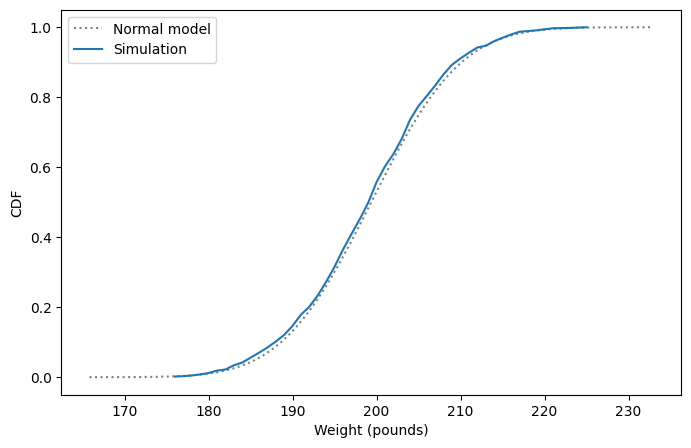

In [ ]:
plot_cdf_plots(cdf_model, cdf_sim_weights, labels=["Normal model", "Simulation"], xlabel="Weight (pounds)")

El modelo normal se ajusta muy bien a la distribución de los pesos.
En general, cuando sumamos suficientes factores aleatorios, la suma tiende a seguir una `distribución normal`.
Esa es una consecuencia del `teorema del límite central`, al que volveremos mas adelante.

---
---

## La distribución log-normal

Anteriormente, simulamos el crecimiento de las calabazas suponiendo que crecen entre `1` y `3 libras` al día, dependiendo del clima.
En cambio, supongamos que su crecimiento es proporcional a su peso actual, de modo que las calabazas grandes ganan más peso al día que las pequeñas, lo que probablemente sea más realista.

La siguiente función simula este tipo de crecimiento proporcional, en el que una calabaza gana un `3%` de su peso si el clima es malo, un `5%` si el clima es regular y un `7%` si el clima es bueno.
Una vez más, supondremos que el clima es malo, regular o bueno en un día cualquiera con la misma probabilidad.

In [ ]:
def simulate_proportionate_growth(n):
  choices = [1.03, 1.05, 1.07]
  gains = np.random.choice(choices, n)
  return gains.prod()

Si una calabaza aumenta un `3%` de su peso, el peso final es el producto del peso inicial y el factor `1.03`.
Así que podemos calcular el peso después de `100 días` eligiendo factores aleatorios y multiplicándolos entre sí.

Llamaremos a esta función `1001` veces para simular `1001` calabazas y guardar sus pesos. Adicionalmente, calcula la `media` y `desviacion estandar` del peso de las calabazas.

In [ ]:
# Tu codigo va aqui
sim_c_weights = [simulate_proportionate_growth(100) for i in range(1001)]
m, s = np.mean(sim_c_weights), np.std(sim_c_weights)

print(f"Peso promedio: {m:4f}, desviacion std: {s:4f}")

Peso promedio: 130.801834, desviacion std: 20.956047


¿Que puedes observar respecto a lo obtenido del modelo anterior?

```
# Tu respuesta va aqui
En el modelo de crecimiento proporcional, la media del peso de las calabazas es menor y la desviación estándar es mayor en comparación con el modelo de crecimiento aditivo. Esto indica que el crecimiento proporcional genera una mayor variabilidad entre los individuos, y los pesos finales están más dispersos. 
```

Debemos demostrar matemáticamente que siguen una **distribución lognormal**, lo que significa que `los logaritmos de los pesos siguen una distribución normal`.

Para comprobarlo, calcula los `logaritmos de los pesos` y su `media` y `desviación estándar`.
Podríamos utilizar logaritmos con cualquier base, pero utiliza la `base 10` porque facilita la interpretación de los resultados.

In [ ]:
# Tu codigo va aqui
log_weights = np.log10(sim_c_weights)
mean_log = np.mean(log_weights)
std_log = np.std(log_weights)

print(f"Media de los logaritmos (base 10): {mean_log:.4f}")
print(f"Desviación estándar de los logaritmos (base 10): {std_log:.4f}")

Media de los logaritmos (base 10): 2.1111
Desviación estándar de los logaritmos (base 10): 0.0690


Toca poner nuestros datos (modelo y simulados) en forma:

- Utiliza el logaritmo de los pesos (simulados) para modelar una distribucion normal y obtener un modelo. Puedes apoyarte en la funcion `make_normal_model`.
- Utiliza estos datos simulados directamente en su forma `CDF`. Puedes apoyarte en la funcion `from_seq`.

In [ ]:
# Tu codigo va aqui
# Modelo normal usando los logaritmos de los pesos simulados
cdf_log_model = make_normal_model(log_weights)

# CDF de los datos simulados (logaritmos de los pesos)
cdf_log_sim = from_seq(log_weights, name="simulation", convert_to="CDF")

cdf_log_model, cdf_log_sim

(1.835186    0.000032
 1.837945    0.000037
 1.840705    0.000044
 1.843464    0.000052
 1.846223    0.000062
               ...   
 2.376036    0.999938
 2.378796    0.999948
 2.381555    0.999956
 2.384315    0.999963
 2.387074    0.999968
 Name: normal model, Length: 201, dtype: float64,
 simulation
 1.857021    0.000999
 1.897994    0.001998
 1.898939    0.002997
 1.915171    0.003996
 1.922892    0.004995
               ...   
 2.303621    0.996004
 2.304093    0.997003
 2.320482    0.998002
 2.337344    0.999001
 2.345696    1.000000
 Name: proportion, Length: 506, dtype: float64)

Ahora compara la `distribución de los logaritmos` con una `distribución normal` con la misma `media` y `desviación estándar`. Puedes apoyarte en la funcion `plot_cdf_plots`.

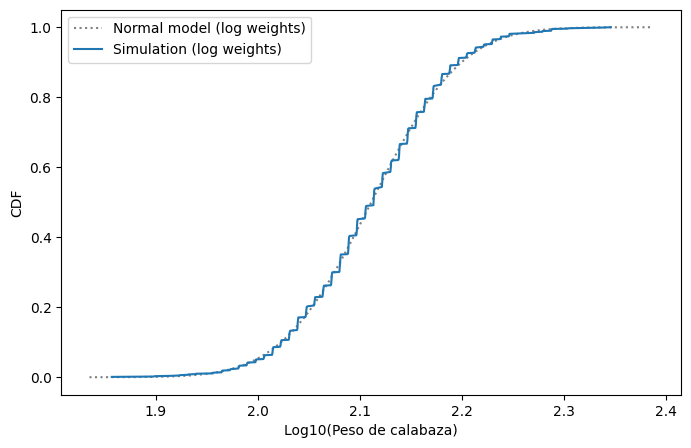

In [ ]:
# Tu codigo va aqui

plot_cdf_plots(cdf_log_model, cdf_log_sim, labels=["Normal model (log weights)", "Simulation (log weights)"], xlabel="Log10(Peso de calabaza)")

Menciona como este modelo LogNormal se ajusta a la simulación, tal y como esperábamos.

```
# Tu respuesta va aqui
El modelo tiene un buen ajuste, ya que sigue la forma de la simulacion aunque hay algunas discrepancias entre el modelo y la simulacion, podemos ver que el modelo sigue muy cerca a la simulacion
```